**Goals**

Berdasarkan permasalahan tersebut, OPA tentu perlu memiliki model yang dapat memprediksi untuk dapat 

**Menentukan Harga Pasaran Properti Berdasarkan Variable dan Karaktersitik Properti**. 

Goal kami adalah Membantu OPA dalam mengatasi permasalahan penentuan harga pasaran / market value. Dimana market value yang nantinya akan ditujukan untuk penentuan nilai pajak pendapatan Kota Phialdephia. 

Kami memberikan asumsi, bobot presentasi komponen pajak ditentukan sesuai regulasi OPA sehingga yang akan kami lakukan hanya menentukan Market value berdasarkan variable dan karakteristik properti saja agar market value dapat dijadikan OPA sebagai dasar perhitungan pendapatan dari sektor properti

Kami mengasumsikan Market Value sebagai NJOP dan PBB adalah pajak yang ditetapkan oleh pemerintah setempat

***

### ***3. Data Cleaning***

### Explanatory Data Analysis

Import library

In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statistics as st
from collections import Counter

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Encoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#Set max column
pd.set_option('display.max_columns', None)

#Set max rows
pd.set_option('display.max_rows', 500)


In [2]:
df = pd.read_csv('PHL_OPA_Properties.csv',index_col= 'Unnamed: 0')

In [3]:
#Melihat deskripsi kategori properti.
df_SF = df[df['category_code_description'] == 'Single Family']

Dalam tahap EDA untuk Regressi ini, ada beberapa step dan output yang di harapakan, sehingga dapat memberika hasil maksimal dalam melakukan machine learning.

Dalam data OPA akan di lakukan EDA dengan 6 kelompok data SOURCE, karena terdapat 6 tipe Properties. Yaitu:

Single family, multi family, mixed use, commercial, industrial, vacant land

Beberapa step yang akan di lakukan adalah:

1. Load Dataset
2. Menghitung Missing data
3. Data Prepocessing
Drop Data
Mengisi NaN dengan Data Lain
Mengisi NaN dengan Median
Mengisi NaN dengan Modus
4. Feature Enginering
5. Data Preprocessing
Dummy Variable
6. Normalized Price
melakukakan Normalisai market value - Kolom market value ditransform menggunakan log
7. Data Visualization

##### 3.1 EDA - Single Family

load dataset single family

In [4]:
df_SF

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
0,NaN,D,S W COR HOWARD,0.0,P50,ROW W/GAR 3 STY MASONRY,1.0,Single Family,700.0,N,NaN,NaN,49.0,113900.0,0.0,5.0,0.0,15.90,NaN,1.0,B,A,1.0,0.0,0.0,108.0,5.0,108 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,186800.0,NaN,2.0,4.0,7.0,0.0,0.0,NaN,PRUSMOWSKI CHARLES L,NaN,11000600,E,NaN,1951-01-31 00:00:00,009S170169,1951-01-31 00:00:00,1.0,NaN,NaN,B,1001.0,82740.0,ST,NaN,WHARTON,NaN,19064.0,53836.0,F,779.0,1650.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681921.0,-75.146866,39.931278
1,NaN,D,15D94 W HOWARD ST,3209422.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,Y,NaN,NaN,49.0,0.0,0.0,2.0,0.0,15.90,NaN,0.0,0,A,1.0,0.0,0.0,110.0,2.0,110 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,341600.0,NaN,1.0,3.0,0.0,0.0,0.0,NaN,SCHMIDT KATHERINE JESSIE,HARRIGAN DEVIN JOHN,11000700,E,NaN,2017-05-09 00:00:00,009S170046,2017-04-14 00:00:00,395000.0,NaN,NaN,NaN,1001.0,82740.0,ST,NaN,WHARTON,NaN,256576.0,85024.0,F,779.1,1203.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681922.0,-75.146921,39.931286
2,NaN,D,"30'51/2"" W HOWARD",0.0,O50,ROW 3 STY MASONRY,1.0,Single Family,700.0,N,NaN,NaN,49.0,45000.0,0.0,4.0,0.0,14.80,NaN,0.0,0,A,1.0,45000.0,0.0,112.0,4.0,112 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,226200.0,NaN,1.0,4.0,0.0,2.0,0.0,NaN,THOMAS J NICOLO,MARY JANE HUDICK,11000800,E,NaN,1975-09-04 00:00:00,009S170168,1975-09-04 00:00:00,1.0,NaN,NaN,NaN,1001.0,82740.0,ST,NaN,WHARTON,NaN,121936.0,59264.0,F,725.2,1482.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681923.0,-75.146971,39.931292
3,NaN,D,"45'2"" W HOWARD ST",2448875.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,Y,NaN,NaN,100.0,36000.0,0.0,4.0,0.0,14.33,NaN,0.0,0,A,1.0,36000.0,0.0,114.0,4.0,114 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,241500.0,NaN,2.0,4.0,8.0,2.0,0.0,NaN,FITTER OWEN D,FITTER JACLYN D,11000900,E,NaN,2012-02-16 00:00:00,009S170129,2012-02-16 00:00:00,1.0,NaN,NaN,A,1001.0,82740.0,ST,NaN,WHARTON,NaN,142227.0,63273.0,F,1433.0,2049.0,A,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681924.0,-75.147034,39.931230
4,NaN,C,"59'6"" W HOWARD ST",3245897.0,O50,ROW 3 STY MASONRY,1.0,Single Family,710.0,N,NaN,2013-07-16 00:00:00,100.0,45000.0,0.0,4.0,0.0,15.00,NaN,0.0,0,A,1.0,45000.0,0.0,116.0,4.0,116 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,237000.0,NaN,2.0,4.0,0.0,3.0,0.0,NaN,HUDRICK EUGENE J,HUDRICK ROBERT E,11001000,E,NaN,2017-07-31 00:00:00,009S170128,2017-07-21 00:00:00,1.0,NaN,NaN,A,1001.0,82740.0,ST,NaN,WHARTON,NaN,129906.0,62094.0,F,1500.0,1155.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681925.0,-75.147087,39.931236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581451,NaN,NaN,NEC RITTENHOUSE SQ,2066015.0,590,RES CONDO 5+ STY MASONRY,1.0,Single Family,820.0,Y,888082048.0,NaN,0.0,0.0,0.0,4.0,0.0,0.00,NaN,0.0,NaN,A,NaN,0.0,47.0,237.

Menghitung missing value

<AxesSubplot:>

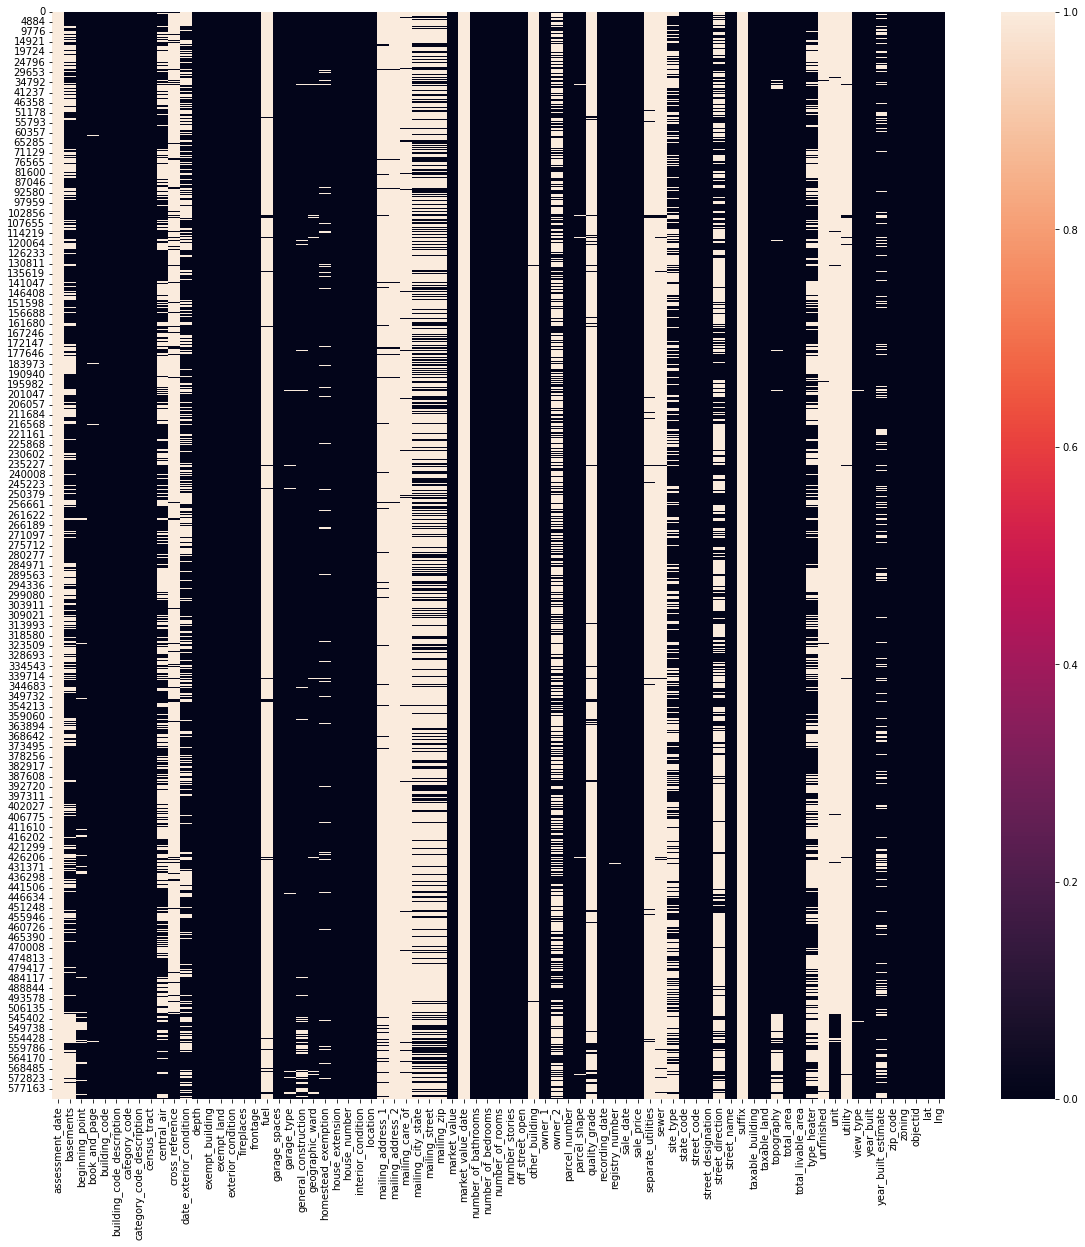

In [5]:
# menghitung missing value
plt.figure(figsize=(20,20))# untuk size
sns.heatmap(df_SF.isna()) # untuk plot heatmap NaN

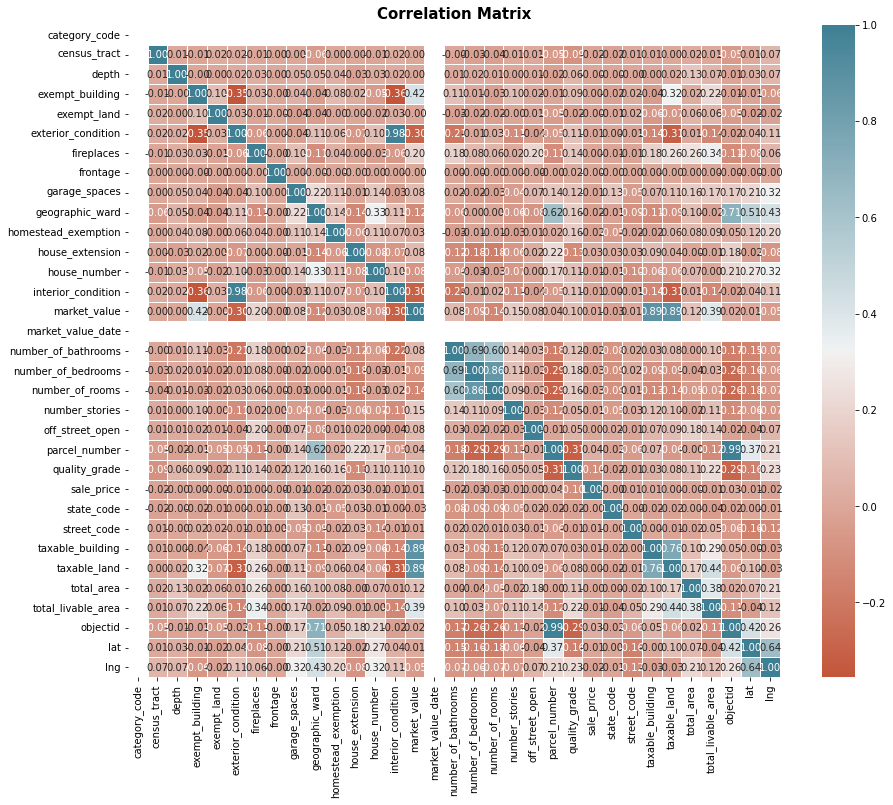

In [6]:
# Correlation matrix tipe data numerik
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_SF.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Preprocessing Data

Drop fitur yang tidak menjadi penentu market value

In [7]:
df_describe =[]

for i in df_SF.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df_SF[i].dtypes,#tipe
        df_SF[i].isna().sum(),#jumlah NaN
        round((((df_SF[i].isna().sum())/(len(df_SF)))*100),2),#Persentase jumlah NaN
        df_SF[i].nunique(),#Jumlah Unique
        df_SF[i].unique() #Unique
        
    ])

In [8]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolo

In [9]:
DESC

,column,type,nan,nan%,nunique,unique
0,assessment_date,object,461572,100.00,1,"[nan, 1949-01-01 00:00:00]"
1,basements,object,162964,35.31,11,"[D, C, 0, I, A, E, H, G, nan, B, J, F]"
2,beginning_point,object,8880,1.92,343828,"[S W COR HOWARD , 15D94 W HOWARD ST ..."
3,book_and_page,object,633,0.14,405171,"[0.0, 3209422.0, 2448875.0, 3245897.0, 1390593..."
4,building_code,object,0,0.00,283,"[P50 , O50 , R30 , O30 , R70 , P70 , P51..."
5,building_code_description,object,0,0.00,283,"[ROW W/GAR 3 STY MASONRY, ROW 3 STY MASONRY, R..."
6,category_code,float64,0,0.00,1,[1.0]
7,category_code_description,object,0,0.00,1,[Single Family]
8,census_tract,float64,0,0.00,421,"[700.0, 710.0, 770.0, 772.0, 771.0, 711.0, 780..."
9,central_air,object,203716,44.14,3,"[N, Y, nan, 0]"


- Berdasarkan presentasi NaN value, terdapat kolom dengan presentasi null value > dari 90% (17 Fitur). Untuk mencegah anomali saat prediksi, kolom ini akan kita drop. Kolom tersebut yaitu: assessment_date, fuel, mailing_address_1, mailing_address_2, mailing_care_of, mailing_city_state, mailing_street, mailing_zip, market_value_date, other_building, quality_grade, separate_utilities, sewer, suffix, unfinished, unit, utility

- Berdasarkan metadata OpenDataPhilly, terdapat kolom yang tidak dapat diekstrak informasinya dan kami drop yaitu (6 fitur) homestead_exemption, objectid, off_street_open, general construction, date exterior condition, site type

- Kami juga akan drop fitur yang merupakan komponen yang membentuk market value (4 fitur) : Taxable land, taxable building, exempt land, exempt building.

- Dan kami menyepakati bahwa terdapat fitur yang tidak mempengaruhi harga properti (22 fitur): beginning_point, book_and_page, building_code, category_code_description, census_tract, cross_reference, date_exterior_condition, geographid_ward, house_extension, house_number, owner_1, owner_2, parcel_number, recording_date, registry_number, sale_date, street_code, street_direction, street_name, year_built_estimation, objectid,


- Tidak ada desksripsi penjelasan fitur sehingga kami drop : off_street_open, general construction, date exterior condition, site type




In [10]:
columns=['assessment_date', # Null Value > 90%
        'fuel',# Null Value > 90%
        'mailing_address_1',# Null Value > 90%
        'mailing_address_2',# Null Value > 90%
        'mailing_care_of', # Null Value > 90%
        'mailing_city_state', # Null Value > 90%
        'mailing_street', # Null Value > 90%
        'mailing_zip', # Null Value > 90%
        'market_value_date', # Null Value > 90%
        'other_building', # Null Value > 90% 
        'quality_grade', # Null Value > 90%
        'separate_utilities', # Null Value > 90%
        'sewer', # Null Value > 90%
        'suffix', # Null Value > 90%
        'unfinished', # Null Value > 90%
        'unit', # Null Value > 90%
        'utility', # Null Value > 90%
        'off_street_open', #Tidak ada penjelasan fitur pada metadata
        'site_type', # TIdak ada penjelasan fitur pada metadata 
        'general_construction', #Tidak ada penjelasan fitur pada metadata
        'homestead_exemption', # tidak ada penjelasan fitur pada metadata
        'taxable_land', # Fitur berkorelasi dengan market value
        'taxable_building', # Fitur berkorelasi dengan market value
        'exempt_land', # Fitur berkorelasi dengan market value
        'exempt_building', # Fitur berkorelasi dengan market value
        'sale_price', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'beginning_point', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'book_and_page', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'building_code', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'category_code', # Fitur sama dengan category code
        'census_tract', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'cross_reference', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'date_exterior_condition', # tidak ada penjelasan fitur pada metadata
        'geographic_ward', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'house_extension', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'house_number', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'owner_1', # Tidak berkaitan dengan tujuan prediksi
        'owner_2', # Tidak berkaitan dengan tujuan prediksi
        'location', # Fitur ini terlalu kecil untuk mengelompokkan properti, untuk itu kami menggunakan state code
        'parcel_number', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'recording_date', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'registry_number', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'sale_date', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'street_code', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'street_direction', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'street_name', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'year_built_estimate', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        'objectid', # Tidak cukup informasi pada fitur ini untuk menentukan market value
        ]
df_SF.drop(columns,inplace=True, axis=1)

Sebagai penguat domain knowledge kami, kami mencari referensi variable dan karakteristik yang dibutuhkan untuk memprediksi market value yang menjadi referensi OPA jika menggunakan metode mass appraisal / ML

- Berdasarkan sumber Standar Mass Appraisal of Real Property dari International Association of Assessing Officer (IAAO) yang diadopsi oleh OPA (https://www.iaao.org/media/standards/StandardOnMassAppraisal.pdf). Terdapat fitur-fitur yang digunakan dalam menentukan market value. 
    1. Total livable area
    2. Exterior condition
    3. Date exterior condition
    4. General construction
    5. Site type
    6. Secondary area (basements, garages)
    7. Building feature (stories, bathrooms, bedrooms, room, central air, depth, fireplaces, interior condition, type heater)
    8. Significant detached structure 
    9. Year built
    10. frontage
    11. parcel shape
    13. topography
    14. zoning
    15. Building category
    15. lat 
    16. lng

- Fitur lainnya merupakan pendukung namun tetap menjadi penentu harga properti

Handling Missing value pada data kategorik. Referensi yang kami gunakan adalah informasi metadata dari dataset PHL_Properties_Philadephia
(https://www.opendataphilly.org/dataset/opa-property-assessments/resource/8b7d5e01-1ad2-45d4-838d-2836cde0c39c)

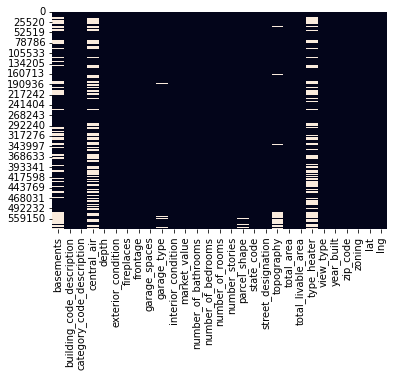

In [11]:
# Missing value heatmap
fig, axes = plt, figsize=(20, 35)
sns.heatmap(df_SF.isnull(), cbar=False);

In [12]:
df_SF.isnull().sum().sort_values(ascending=False)

central_air                  203716
type_heater                  196269
basements                    162964
topography                    31892
garage_type                    4571
parcel_shape                   3782
view_type                      1197
lat                             145
lng                             145
interior_condition              123
state_code                       52
exterior_condition               30
zoning                           16
garage_spaces                     2
year_built                        2
total_livable_area                2
fireplaces                        2
number_stories                    2
number_of_bedrooms                2
number_of_bathrooms               2
number_of_rooms                   2
frontage                          1
total_area                        1
depth                             1
street_designation                0
building_code_description         0
zip_code                          0
market_value                

In [13]:
df_SF.reset_index(inplace=True)

In [14]:
df_SF.drop(columns='index', inplace=True)

Berikut list kategori yang masih terdapat missing valuesehingga perlu ada strategi fillna yang mengacu pada referensi kami
  
1. basements                                     
2. central air                  
3. garage tyoe                  
4. parcel shape           
5. topography           
6. type heater 
7. view type

In [15]:
df_SF['basements'] = df_SF['basements'].fillna('0') 
# Mengasumsikan NaN pada row adalah tidak mempunyai basement sehingga diisi 0. Acuan asumsi pada penjelasan metadata

In [16]:
df_SF['central_air'] = df_SF['central_air'].fillna('N') 
# Mengasumsikan NaN pada row adalah tidak central air sehingga diisi 'N'. Acuan asumsi pada penjelasan metadata

In [17]:
df_SF['garage_type'] = df_SF['garage_type'].fillna('0') 
# Mengasumsikan NaN pada row adalah tidak ada garasi sehingga diisi '0'. Acuan asumsi pada penjelasan metadata

In [18]:
df_SF['parcel_shape']=df_SF['parcel_shape'].fillna('E') 
# Mengasumsikan NaN pada row adalah parcel berbentuk rectangular sehingga diisi 'E'. Acuan asumsi pada penjelasan metadata

In [19]:
df_SF['topography']=df_SF['topography'].fillna('F') 
# Mengasumsikan NaN pada row adalah ketinggian properti sejajar dengan jalan akses sehingga diisi 'F'. Acuan asumsi pada penjelasan metadata

In [20]:
df_SF['type_heater'] = df_SF['type_heater'].fillna('0') 
# Mengasumsikan NaN pada row adalah tidak ada heater sehingga diisi '0'. Acuan asumsi pada penjelasan metadata

In [21]:
df_SF['exterior_condition'] = df_SF['exterior_condition'].fillna('0') 
# Mengasumsikan NaN pada row adalah kondisi eksterior tidak dapat diinterpretasi sehingga diisi nilai '0'. Acuan asumsi pada penjelasan metadata

In [22]:
df_SF['interior_condition'] = df_SF['interior_condition'].fillna('0') 
# Mengasumsikan NaN pada row adalah kondisi interior tidak dapat diinterpretasi sehingga diisi nilai '0'. Acuan asumsi pada penjelasan metadata

In [23]:
df_SF['view_type'] = df_SF['view_type'].fillna('0') 
# Mengasumsikan NaN pada row adalah kondisi view tidak dapat diinterpretasi sehingga diisi nilai '0'. Acuan asumsi pada penjelasan metadata

In [24]:
#cek kembali jumlah missing value
df_SF.isnull().sum().sort_values(ascending=False)

lng                          145
lat                          145
state_code                    52
zoning                        16
number_of_bathrooms            2
year_built                     2
total_livable_area             2
number_stories                 2
number_of_bedrooms             2
number_of_rooms                2
garage_spaces                  2
fireplaces                     2
frontage                       1
depth                          1
total_area                     1
interior_condition             0
type_heater                    0
category_code_description      0
central_air                    0
zip_code                       0
view_type                      0
topography                     0
exterior_condition             0
market_value                   0
street_designation             0
parcel_shape                   0
building_code_description      0
garage_type                    0
basements                      0
dtype: int64

In [25]:
df_SF.dropna(inplace=True) # Kemudian kami drop row dengan missing value, karena kita ingin menjaga keaslian dataset yang bersifat numerik. Hal ini kita lakukan karena missing value numerik jumlahnya hanya sedikit

In [26]:
df_SF.reset_index(inplace=True)

In [27]:
df_SF.drop(columns='index', inplace=True)

In [28]:
df_SF.shape # hasil fill na dan drop na

(461359, 29)

In [29]:
dfa = df_SF.copy() #untuk membandingkan visualisasi sebelum dan sesudah filtering

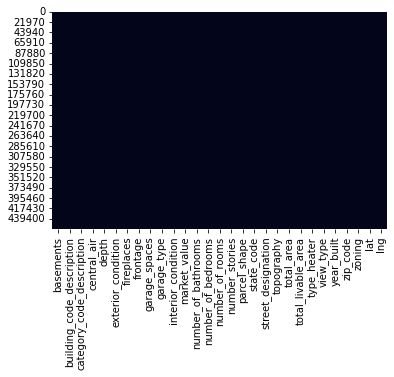

In [30]:
# Missing value setelah dilakukan fillna dan drop na
fig, axes = plt, figsize=(20, 35)
sns.heatmap(df_SF.isnull(), cbar=False);

# Data Cleaning

*Mengubah tipe data year_built dari object menjadi float*

In [31]:
#Mengubah tipe data year_built dari object menjadi float
df_SF['year_built'] = df_SF['year_built'].astype(float)

Mengubah isi data 0 pada central air menjadi N

In [55]:
df_SF['central_air'] = df_SF['central_air'].replace(to_replace='0',value='N') 
# Mengasumsikan NaN pada row adalah kondisi interior tidak dapat diinterpretasi sehingga diisi nilai '0'. Acuan asumsi pada penjelasan metadata

*Menghapus Data row pada kolom exterior_condition & interior_condition = 1, karena tidak ada penjelasan arti angka 1 pada penjelasan metadata*

In [32]:
df_SF = df_SF[(df_SF['exterior_condition'] != 1) & (df_SF['interior_condition'] != 1)]

*Drop total area & total livable area = 0*

In [33]:
df_SF = df_SF[df_SF['total_area'] != 0]

In [34]:
df_SF = df_SF[df_SF['total_livable_area'] != 0]

*Drop year built = 0, karena tidak ada tahun bangunan dibangun yang 0*

In [35]:
df_index1 = df_SF[df_SF['year_built'] == 0].index
df_SF.drop(df_index1, inplace=True)

*Drop market value = 0, karena tidak ada properti yang memiliki nilai market value 0*

In [36]:
df_index2 = df_SF[df_SF['market_value'] == 0].index
df_SF.drop(df_index2, inplace=True)

In [37]:
df_SF.shape

(419249, 29)

*Perbandingan sebaran data market value sebelum dan sesudah di log*

Text(0.5, 1.0, 'Setelah Diubah Menjadi Log')

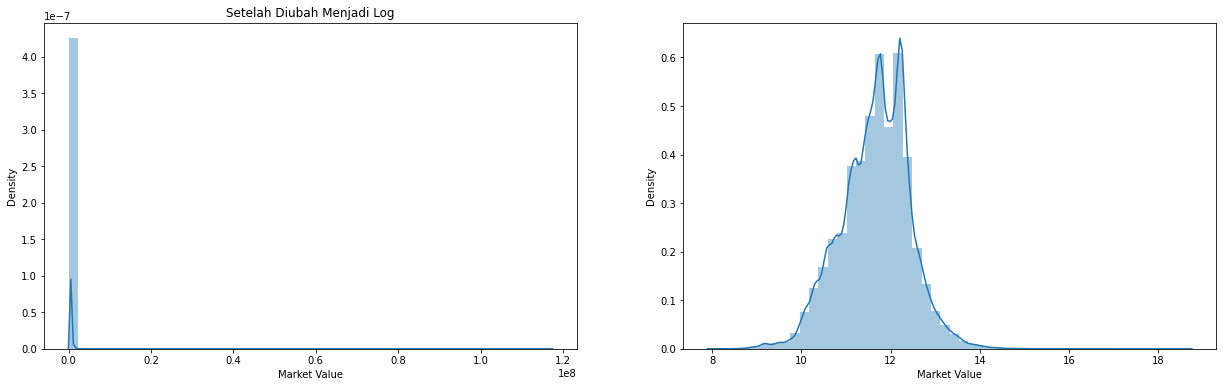

In [38]:
import matplotlib.pyplot as plt

df_model = np.log(df_SF['market_value'])

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df_SF['market_value'], ax=axes[0])
sns.distplot(df_model, ax=axes[1])
axes[0].set_xlabel('Market Value')
axes[0].set_title('Sebelum Diubah Menjadi Log')
axes[1].set_xlabel('Market Value')
axes[0].set_title('Setelah Diubah Menjadi Log')

Terlihat data yang telah diubah kedalam bentuk log terlihat lebih terdistribusi normal, sehingga data dianggap sudah cukup baik

Mengecek fitur numerik

In [39]:
numerics = ['float64']
df_num = df_SF.select_dtypes(include=numerics)

In [40]:
import matplotlib.pyplot as plt

def analisis(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analisis():
  result = pd.DataFrame()

  for col in df_num.columns:
    analysis = analisis(df_num[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def ploting(column):
  f, (ax_box, ax_hist) = plt.subplots(2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analisis(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [41]:
dataframe_analisis()

,Column,Mean,Mode,Median,Variance,Standard Deviation,Skew
0,depth,84.276143,100.000000,80.000000,7.266240e+04,269.559644,386.226265
1,fireplaces,0.040205,0.000000,0.000000,6.985436e-02,0.264300,9.615922
2,frontage,1052.675613,16.000000,16.000000,4.451924e+11,667227.381545,647.494364
3,garage_spaces,0.388185,0.000000,0.000000,3.446850e-01,0.587099,10.152505
4,market_value,155248.621702,134900.000000,123800.000000,5.343114e+10,231151.767773,313.049900
5,number_of_bathrooms,0.902702,1.000000,1.000000,2.930223e-01,0.541315,1.176019
6,number_of_bedrooms,2.525931,3.000000,3.000000,1.727060e+00,1.314176,-0.381075
7,number_of_rooms,4.842399,6.000000,6.000000,6.661467e+00,2.580982,-0.877904
8,number_stories,1.773474,2.000000,2.000000,7.002050e-01,0.836783,-1.105495
9,state_code,1012.568462,1001.000000,1001.000000,3.946733e+04,198.663866,17.277951


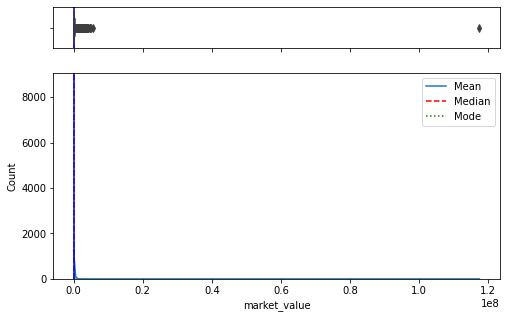

In [42]:
ploting(df_SF['market_value'])

In [43]:
# Outliers pada fitur price
find_anomalies(df_SF['market_value'])

IQR: 127600.0
limit_bawah: -120000.0
limit_atas: 390400.0


In [44]:
# melakukan pembatasan fitur market value dengan limit atas IQR
df_index3 = df_SF[df_SF['market_value'] > 390400].index
df_SF.drop(df_index3, inplace=True)

Text(0.5, 0, 'Relasi market value dengan total livable area')

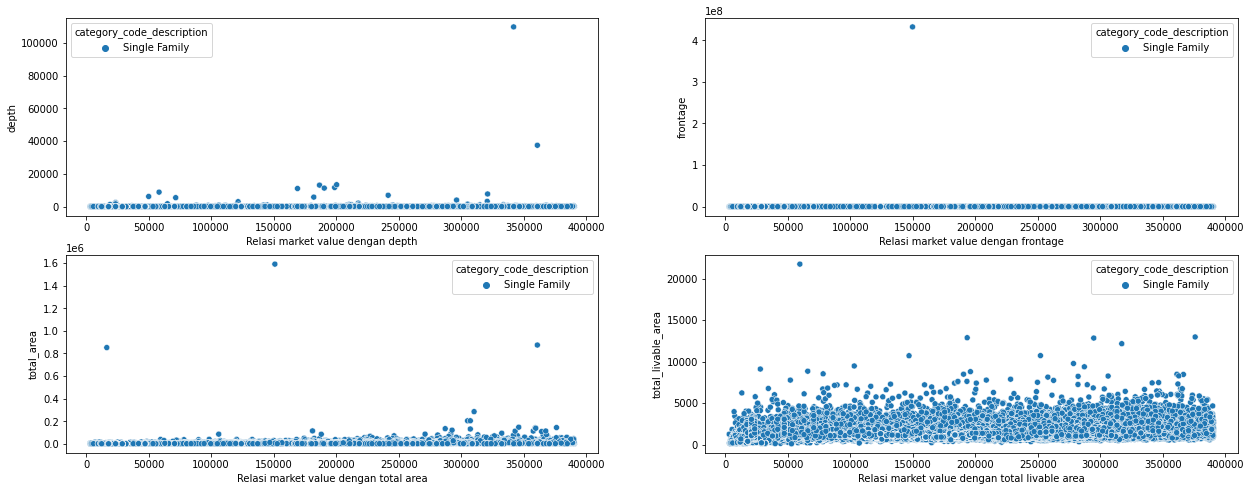

In [45]:
# Plot market value dengan karakteristik properti numerik continous
fig, axes = plt.subplots(2,2, figsize=(21, 8))
sns.scatterplot(data=df_SF, x="market_value", y="depth", hue="category_code_description",style='category_code_description', ax=axes[0][0])
sns.scatterplot(data=df_SF, x="market_value", y="frontage", hue="category_code_description",style='category_code_description', ax=axes[0][1])
sns.scatterplot(data=df_SF, x="market_value", y="total_area", hue="category_code_description",style='category_code_description', ax=axes[1][0])
sns.scatterplot(data=df_SF, x="market_value", y="total_livable_area", hue="category_code_description",style='category_code_description', ax=axes[1][1])

axes[0][0].set_xlabel('Relasi market value dengan depth')
axes[0][1].set_xlabel('Relasi market value dengan frontage')
axes[1][0].set_xlabel('Relasi market value dengan total area')
axes[1][1].set_xlabel('Relasi market value dengan total livable area')

In [46]:
#melakukan filter data dengan depth < 2000
df_index4 = df_SF[df_SF['depth'] > 2000].index
df_SF.drop(df_index4, inplace=True)

In [47]:
#melakukan filter data dengan frontage < 600
df_index5 = df_SF[df_SF['frontage'] > 600].index
df_SF.drop(df_index5, inplace=True)

In [48]:
#melakukan filter data dengan total area < 600000
df_index6 = df_SF[df_SF['total_area'] > 150000].index
df_SF.drop(df_index6, inplace=True)

In [49]:
#melakukan filter data dengan total area < 15000
df_index7 = df_SF[df_SF['total_livable_area'] > 15000].index
df_SF.drop(df_index7, inplace=True)

Text(0.5, 0, 'Jumlah kategori properti dengan kategori interior condition')

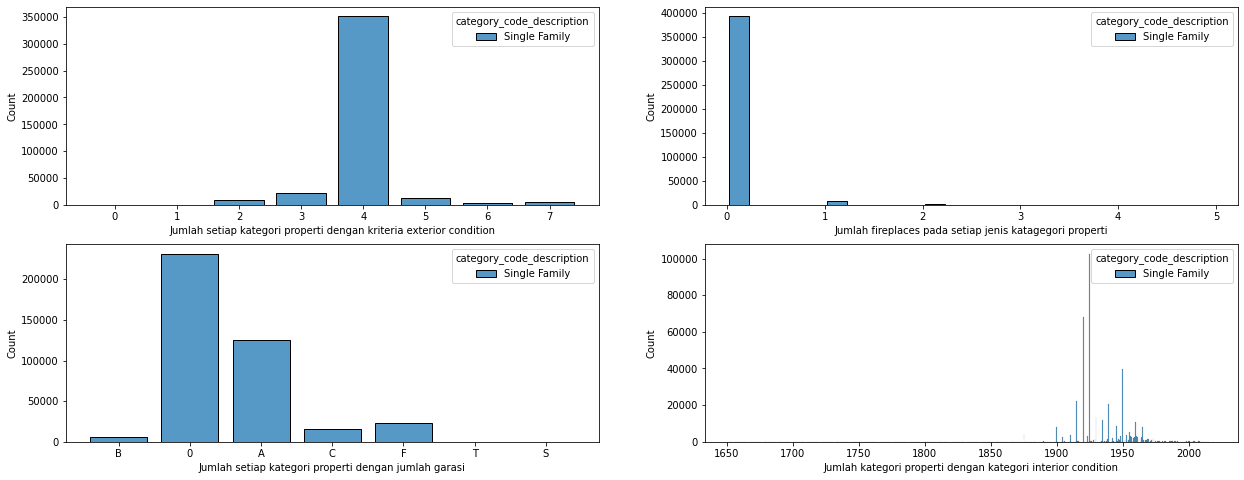

In [50]:
# Plot market value dengan karakteristik properti numerik discreate
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(21, 8))
sns.histplot(data=df_SF, x="interior_condition", hue="category_code_description", multiple="dodge", shrink=.8,ax=axes[0][0])
sns.histplot(data=df_SF, x="fireplaces", hue="category_code_description", multiple="dodge", shrink=.8,ax=axes[0][1])
sns.histplot(data=df_SF, x="garage_type", hue="category_code_description", multiple="dodge", shrink=.8,ax=axes[1][0])
sns.histplot(data=df_SF, x="year_built", hue="category_code_description", multiple="dodge", shrink=.8,ax=axes[1][1])
axes[0][0].set_xlabel('Jumlah setiap kategori properti dengan kriteria exterior condition')
axes[0][1].set_xlabel('Jumlah fireplaces pada setiap jenis katagegori properti')
axes[1][0].set_xlabel('Jumlah setiap kategori properti dengan jumlah garasi')
axes[1][1].set_xlabel('Jumlah kategori properti dengan kategori interior condition')

Kemudian kita cek kembali outlier berdasarkan grafik

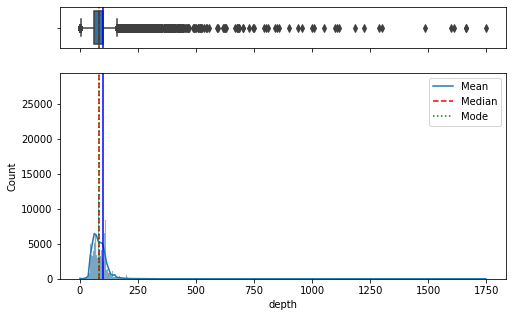

In [51]:
ploting(df_SF['depth'])

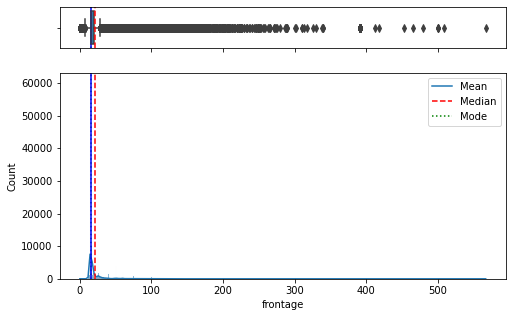

In [52]:
ploting(df_SF['frontage'])

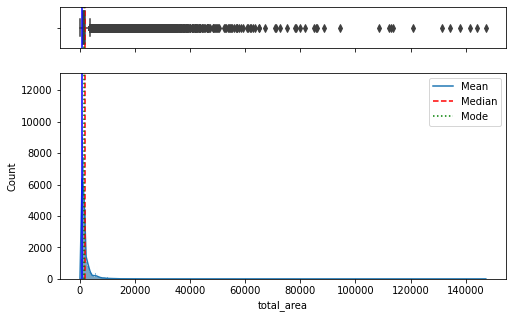

In [54]:
ploting(df_SF['total_area'])

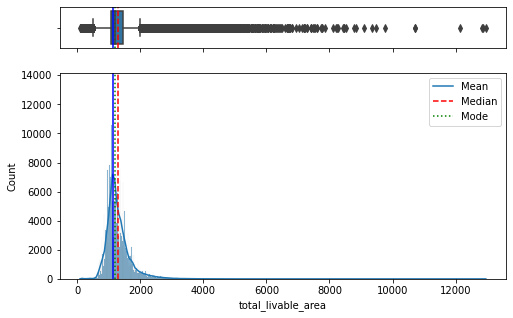

In [56]:
ploting(df_SF['total_livable_area'])

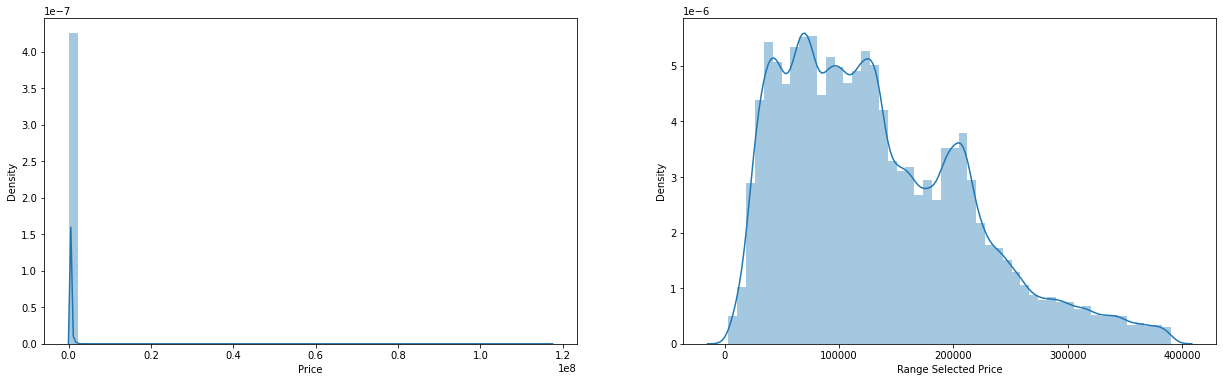

In [57]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(dfa['market_value'], ax=axes[0])
sns.distplot(df_SF['market_value'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

***

Grafik setelah data cleaning

In [58]:
# Plot market value dengan karakteristik properti numerik continous setelah data cleaning
fig, axes = plt.subplots(2,2, figsize=(21, 8))
sns.scatterplot(data=df_SF, x="market_value", y="depth", hue="category_code_description",style='category_code_description', ax=axes[0][0])
sns.scatterplot(data=df_SF, x="market_value", y="frontage", hue="category_code_description",style='category_code_description', ax=axes[0][1])
sns.scatterplot(data=df_SF, x="market_value", y="total_area", hue="category_code_description",style='category_code_description', ax=axes[1][0])
sns.scatterplot(data=df_SF, x="market_value", y="total_livable_area", hue="category_code_description",style='category_code_description', ax=axes[1][1])

axes[0][0].set_xlabel('Relasi market value dengan depth')
axes[0][1].set_xlabel('Relasi market value dengan frontage')
axes[1][0].set_xlabel('Relasi market value dengan total area')
axes[1][1].set_xlabel('Relasi market value dengan total livable area')

Text(0.5, 0, 'Relasi market value dengan total livable area')

Error in callback <function flush_figures at 0x00000204F49325F0> (for post_execute):


KeyboardInterrupt: 

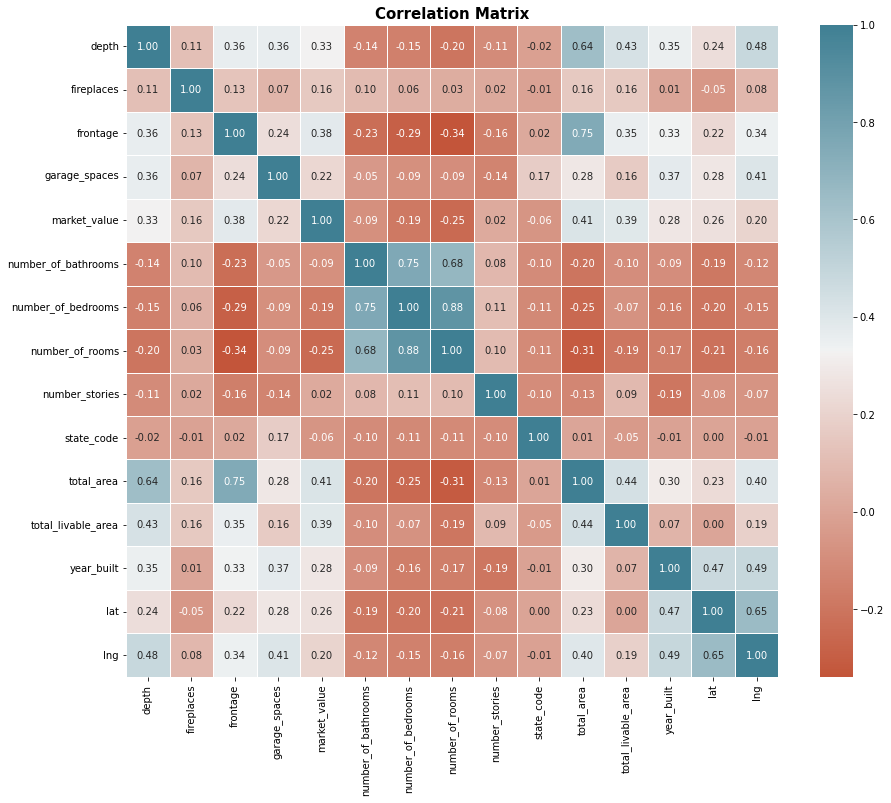

In [ ]:
# Correlation matrix setelah data cleaning
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_SF.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

<AxesSubplot:xlabel='lat', ylabel='lng'>

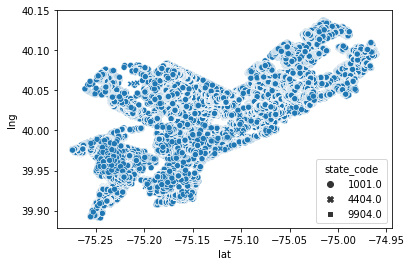

In [ ]:
#mapping distribusi properti single family
sns.scatterplot(data=df_SF, x="lat", y="lng", style="state_code")

In [60]:
df_SF.to_csv('PHL_OPA_Properties_Clean.csv')

***

Hasil temuan dari EDA

1.	Terlihat market value pada dataset memiliki rentang yang sangat besar dan adanya ketidakwajaran terhadap property single family (dari $ 0 - $ 70,000,000). Oleh karena itu perlu dilakukan drop data yang tidak wajar dan cut off nilai dengan rentang yang sangat jauh. Berdasakran Analisa IQR market value, kita cut off batas atas dengan market value di $390.400. Total row yang di drop sebanyak 31,650 data / 7 % dari total seluruh data (sebelum nya 461,573 menjadi 429,923)
2.	Berdasarkan distirbusi data nya, dataset tersebut terindikasi memiliki missing value di berbagai fitur sehingga untuk mengisi missing value dilakukan dengan domain knowledge sesuai metadata dataset. Untuk nilai numerik, kami tidak melakukan input missing value akan kami drop row karena kami ingin tetap menjaga integritas dari dataset karakteristik property single family. Hal ini akan mempengaruhi keakuratan model prediksi
3.	Setelah handling missing value, terlihat pola yang sama antara market value dengan fitur numerik. Dimana ada indikasi
    - Semakin tinggi depth property single family, ada kecenderungan market value meningkat. Hal ini masuk akal jika ingin property yang bebas banjir maka posisi berada property harus lebih tinggi dari badan jalan.
    - Semaking lebar frontage property single family, ada kecenderungan harga meningkat. Namun ada juga property yang frontage lebar, market value juga meningkat
    -   Semakin total area luas, maka semakin mahal juga market value nya. Dan ini masuk akal jika luas property makin besar maka harga cenderung akan lebih mahal
    -  Semakin total area livable luas, maka semakin mahal juga market value nya. Dan ini masuk akal jika luas property yang menampung orang lebih banyak makin besar maka harga cenderung akan lebih mahal
4.	Dari hasil data cleaning, terlihat market value dan total area memiliki korelasi terbesar. Dan ini masuk akal terhadap pola grafiknya
5.	Dari hasil data cleaning ini diperoleh total dataset sebanyak 400,560 data. (Jika dihitung dari total kesuluruhan data kami membatasi data dengan filter sebanyak 61,013 data / 13% dari total seluruh dataset property single family
